Hunter Bennett | Kupffer Strains | Glass Lab | 20 April 2021

Goal of this notebook is to make figure formatted analyses of homer motif enrichment heatmaps for placement in figures. One outstanding issue is how we will select the TFs to be plotted. Manual curation will probably end up being the strategy.

In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 200
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('ticks')
# get matplotlib to save readable fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from plotting_scripts import label_point, pca_rpkm_mat, get_diff_volcano
from homer_preprocessing import read_annotated_peaks, import_homer_diffpeak, pull_comparisons_get_diff
from gene_expression_plots import survey_strain_amln_gene_exp, survey_strain_ccl4_gene_exp

In [2]:
dataDirectory = ''
workingDirectory = '/home/h1bennet/strains/results/06b_Strains_Control_Combined_H3K27Ac/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

# Aggregate results - Homer

In [3]:
known_motif_pval_frame = pd.read_csv('./homer_known_motifs_log.txt', sep='\t', index_col=0)

In [4]:
known_motif_pval_frame.head()

,00_c57_intersection_distal_motifs,00_c57_intersection_motifs,00_c57_union_distal_motifs,00_c57_union_motifs,01_balbc_intersection_distal_motifs,01_balbc_intersection_motifs,01_balbc_union_distal_motifs,01_balbc_union_motifs,02_aj_intersection_distal_motifs,02_aj_intersection_motifs,02_aj_union_distal_motifs,02_aj_union_motifs
MITF(bHLH)/MastCells-MITF-ChIP-Seq(GSE48085)/Homer,-17.450,-12.7300,-10.7700,-7.502,-9.754000,-8.889000,-33.590000,-30.280000,-1.6470,-1.636,-4.5330,-3.8980
IRF2(IRF)/Erythroblas-IRF2-ChIP-Seq(GSE36985)/Homer,-6.804,-9.5330,-18.7600,-28.870,-0.004163,-0.002854,-0.000148,-0.000300,-6.8340,-5.664,-10.2600,-12.0500
ISRE(IRF)/ThioMac-LPS-Expression(GSE23622)/Homer,-7.334,-8.6110,-17.3900,-22.110,-0.060590,-0.070490,-0.003104,-0.005859,-4.9530,-4.144,-10.7000,-10.9700
"LXRE(NR),DR4/RAW-LXRb.biotin-ChIP-Seq(GSE21512)/Homer",-12.560,-13.2800,-21.2700,-20.360,-1.643000,-1.473000,-0.410300,-0.280200,-6.6260,-6.782,-0.2869,-0.1782
AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,-1.071,-0.9981,-0.7028,-1.239,-10.160000,-13.480000,-19.310000,-29.030000,-0.8285,-1.012,-1.7340,-2.8460


# Plot known motif results

## Top 10 motifs per comparison

### Intersection motifs

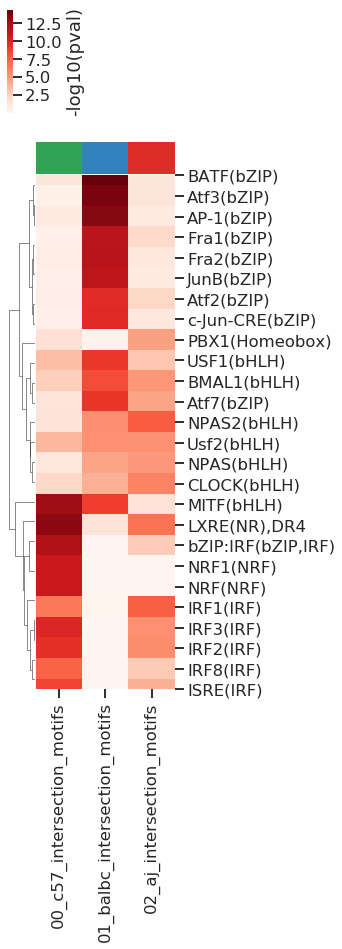

In [5]:
n_motifs = 10
motif_list = []
tmp_frame = known_motif_pval_frame.loc[:, known_motif_pval_frame.columns.str.contains('intersection')]
tmp_frame = tmp_frame.loc[:, ~tmp_frame.columns.str.contains('distal')]
#clean up rows for tmp frame
tmp_frame.index = tmp_frame.index.str.split('/').str[0]

for i in tmp_frame.columns:
    motif_list.extend(tmp_frame.sort_values(i, ascending=True).index.tolist()[:n_motifs])
motif_list = set(motif_list)

cm = sns.clustermap(
    -tmp_frame.loc[motif_list, :],
    cmap='Reds',
    # linewidths=1,
    # linecolor='k',
    # annot=True,
    cbar_kws={'label': '-log10(pval)'},
    col_cluster=False,
    # square=True,
    # center=0,
    # ax=ax,
    col_colors=['#31a354', '#3182bd', '#de2d26'],
    yticklabels=1,
    figsize=(3,12.5))

plt.savefig('./fancy_figures/homer_enrichedmotifs_top10perstrain_intersection_enhancers.pdf',
            dpi=300,
            bbox_inches='tight')

### Intersection motifs distal

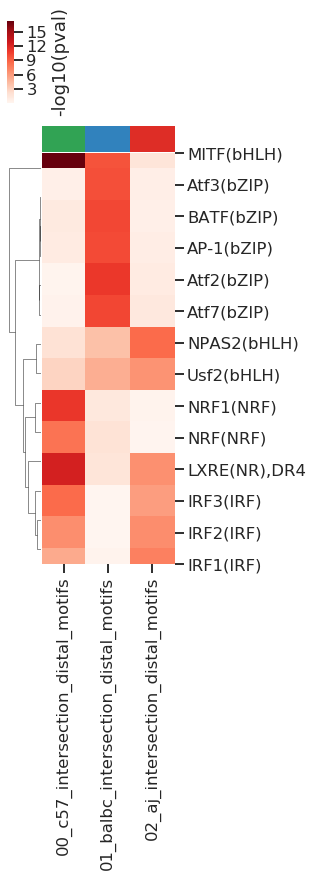

In [6]:
n_motifs = 5
motif_list = []
tmp_frame = known_motif_pval_frame.loc[:, known_motif_pval_frame.columns.str.contains('intersection')]
tmp_frame = tmp_frame.loc[:, tmp_frame.columns.str.contains('distal')]
#clean up rows for tmp frame
tmp_frame.index = tmp_frame.index.str.split('/').str[0]

for i in tmp_frame.columns:
    motif_list.extend(tmp_frame.sort_values(i, ascending=True).index.tolist()[:n_motifs])
motif_list = set(motif_list)

cm = sns.clustermap(
    -tmp_frame.loc[motif_list, :],
    cmap='Reds',
    # linewidths=1,
    # linecolor='k',
    # annot=True,
    cbar_kws={'label': '-log10(pval)'},
    col_cluster=False,
    # square=True,
    # center=0,
    # ax=ax,
    col_colors=['#31a354', '#3182bd', '#de2d26'],
    yticklabels=1,
    figsize=(3,10))

plt.savefig('./fancy_figures/homer_enrichedmotifs_top5perstrain_intersection_enhancers_distal.pdf',
            dpi=300,
            bbox_inches='tight')
# plt.close()

### Union motifs

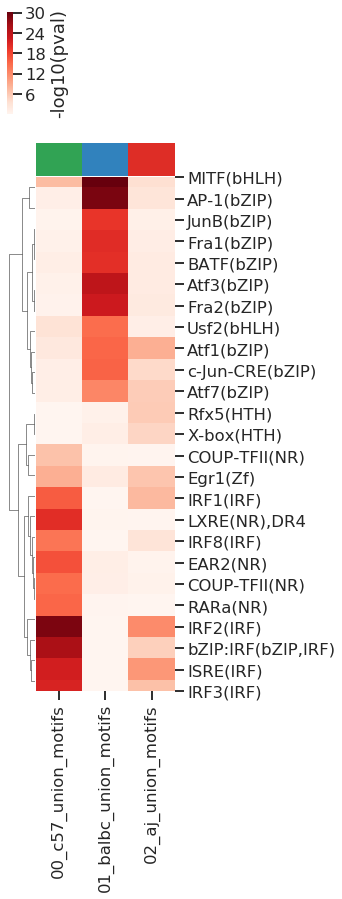

In [7]:
n_motifs = 10
motif_list = []
tmp_frame = known_motif_pval_frame.loc[:, known_motif_pval_frame.columns.str.contains('union')]
tmp_frame = tmp_frame.loc[:, ~tmp_frame.columns.str.contains('distal')]
#clean up rows for tmp frame
tmp_frame.index = tmp_frame.index.str.split('/').str[0]

for i in tmp_frame.columns:
    motif_list.extend(tmp_frame.sort_values(i, ascending=True).index.tolist()[:n_motifs])
motif_list = set(motif_list)

sns.clustermap(
    -tmp_frame.loc[motif_list, :],
    cmap='Reds',
    # linewidths=1,
    # linecolor='k',
    # annot=True,
    cbar_kws={'label': '-log10(pval)'},
    col_cluster=False,
    # square=True,
    # center=0,
    # ax=ax,
    yticklabels=1,
    col_colors=['#31a354', '#3182bd', '#de2d26'],
    figsize=(3,12.5))

plt.savefig('./fancy_figures/homer_enrichedmotifs_top10perstrain_union_enhancers.pdf',
            dpi=300,
            bbox_inches='tight')

### Union distal enhancers

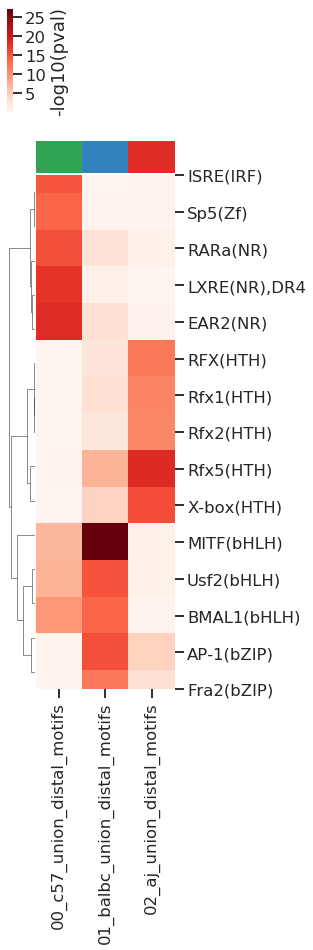

In [13]:
n_motifs = 5
motif_list = []
tmp_frame = known_motif_pval_frame.loc[:, known_motif_pval_frame.columns.str.contains('union')]
tmp_frame = tmp_frame.loc[:, tmp_frame.columns.str.contains('distal')]
#clean up rows for tmp frame
tmp_frame.index = tmp_frame.index.str.split('/').str[0]

for i in tmp_frame.columns:
    motif_list.extend(tmp_frame.sort_values(i, ascending=True).index.tolist()[:n_motifs])
motif_list = set(motif_list)

sns.clustermap(
    -tmp_frame.loc[motif_list, :],
    cmap='Reds',
    # linewidths=1,
    # linecolor='k',
    # annot=True,
    cbar_kws={'label': '-log10(pval)'},
    col_cluster=False,
    # square=True,
    # center=0,
    # ax=ax,
    yticklabels=1,
    col_colors=['#31a354', '#3182bd', '#de2d26'],
    figsize=(3,12.5))

plt.savefig('./fancy_figures/homer_enrichedmotifs_top5perstrain_union_enhancers_distal.pdf',
            dpi=300,
            bbox_inches='tight')

## Option for future: set custom motif list

In [9]:
motif_list = []

### Intersection enhancers

In [10]:
tmp_frame = known_motif_pval_frame.loc[:, known_motif_pval_frame.columns.str.contains('intersection')]
tmp_frame = tmp_frame.loc[:, ~tmp_frame.columns.str.contains('distal')]
tmp_frame = tmp_frame.loc[motifs, :]

#clean up rows for tmp frame
tmp_frame.index = tmp_frame.index.str.split('/').str[0]

cm = sns.clustermap(
    -tmp_frame.loc[motif_list, :],
    cmap='Reds',
    # linewidths=1,
    # linecolor='k',
    # annot=True,
    cbar_kws={'label': '-log10(pval)'},
    col_cluster=False,
    # square=True,
    # center=0,
    # ax=ax,
    col_colors=['#31a354', '#3182bd', '#de2d26'],
    yticklabels=1,
    figsize=(3,12.5))

plt.savefig('./fancy_figures/homer_enrichedmotifs_custommotifs_intersection_enhancers.pdf',
            dpi=300,
            bbox_inches='tight')

NameError: name 'motifs' is not defined

### Intersection enhancers distal

In [ ]:
tmp_frame = known_motif_pval_frame.loc[:, known_motif_pval_frame.columns.str.contains('intersection')]
tmp_frame = tmp_frame.loc[:, tmp_frame.columns.str.contains('distal')]
tmp_frame = tmp_frame.loc[motifs, :]

#clean up rows for tmp frame
tmp_frame.index = tmp_frame.index.str.split('/').str[0]

cm = sns.clustermap(
    -tmp_frame.loc[motif_list, :],
    cmap='Reds',
    # linewidths=1,
    # linecolor='k',
    # annot=True,
    cbar_kws={'label': '-log10(pval)'},
    col_cluster=False,
    # square=True,
    # center=0,
    # ax=ax,
    col_colors=['#31a354', '#3182bd', '#de2d26'],
    yticklabels=1,
    figsize=(3,12.5))

plt.savefig('./fancy_figures/homer_enrichedmotifs_custommotifs_intersection_distal_enhancers.pdf',
            dpi=300,
            bbox_inches='tight')

### Union enhancers

In [ ]:
tmp_frame = known_motif_pval_frame.loc[:, known_motif_pval_frame.columns.str.contains('union')]
tmp_frame = tmp_frame.loc[:, ~tmp_frame.columns.str.contains('distal')]
tmp_frame = tmp_frame.loc[motifs, :]

#clean up rows for tmp frame
tmp_frame.index = tmp_frame.index.str.split('/').str[0]

cm = sns.clustermap(
    -tmp_frame.loc[motif_list, :],
    cmap='Reds',
    # linewidths=1,
    # linecolor='k',
    # annot=True,
    cbar_kws={'label': '-log10(pval)'},
    col_cluster=False,
    # square=True,
    # center=0,
    # ax=ax,
    col_colors=['#31a354', '#3182bd', '#de2d26'],
    yticklabels=1,
    figsize=(3,12.5))

plt.savefig('./fancy_figures/homer_enrichedmotifs_custommotifs_union_enhancers.pdf',
            dpi=300,
            bbox_inches='tight')

### Union distal enhancers

In [ ]:
tmp_frame = known_motif_pval_frame.loc[:, known_motif_pval_frame.columns.str.contains('union')]
tmp_frame = tmp_frame.loc[:, tmp_frame.columns.str.contains('distal')]
tmp_frame = tmp_frame.loc[motifs, :]

#clean up rows for tmp frame
tmp_frame.index = tmp_frame.index.str.split('/').str[0]

cm = sns.clustermap(
    -tmp_frame.loc[motif_list, :],
    cmap='Reds',
    # linewidths=1,
    # linecolor='k',
    # annot=True,
    cbar_kws={'label': '-log10(pval)'},
    col_cluster=False,
    # square=True,
    # center=0,
    # ax=ax,
    col_colors=['#31a354', '#3182bd', '#de2d26'],
    yticklabels=1,
    figsize=(3,12.5))

plt.savefig('./fancy_figures/homer_enrichedmotifs_custommotifs_union_distal_enhancers.pdf',
            dpi=300,
            bbox_inches='tight')